<a href="https://colab.research.google.com/github/adichiara/DS-image-processing/blob/master/Dermascan_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 
import pandas as pd
import numpy as np
 
from numpy import asarray
from numpy import save
from numpy import load
 
import math
import statistics
 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
 
import PIL.Image
import webbrowser
import tkinter as tk
from PIL import ImageTk, Image
from IPython.display import Image, display
 
import csv 
 
from skimage import data, io, filters
import skimage.measure
from skimage import morphology
 
import scipy
from scipy import ndimage
from scipy.ndimage.measurements import center_of_mass
 
 
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
 
import cv2
 
from google.colab import files
from google.colab.patches import cv2_imshow
import os, sys
 
from pprint import pprint 
 
%matplotlib inline
from ipywidgets import interactive
 
# set trucate printing to off
np.set_printoptions(threshold=sys.maxsize)
pd.set_option("display.max_rows", None, "display.max_columns", None)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

root_path = '/content/gdrive/My Drive/Work/DermaScan'  #change dir to your project folder

#!ls "/content/gdrive/My Drive/Work/DermaScan"

Mounted at /content/gdrive


In [ ]:
image_info = pd.read_csv('/content/gdrive/My Drive/Adam/Work/DermaScan/dermascan image file info with image info.csv', header=0)


In [ ]:
path = '/content/gdrive/My Drive/Adam/Work/DermaScan/Image Array Files/'
image_info["numpy_file_full"] = path
image_info["numpy_file_full"] = image_info["numpy_file_full"].str.cat(image_info["numpy_file"].str[38:100], sep='')
 

In [ ]:

subject_list = image_info["subject"].unique()
location_list = image_info["location"].unique()
 

In [ ]:
scale_50mhz = 7.089211/1024

scale_20mhz = 14.178421/1024

print("50mhz",scale_50mhz)
print("20mhz",scale_20mhz)




50mhz 0.0069230576171875
20mhz 0.0138461142578125


In [ ]:

left_hand_back = ['L1','L2','L3','L4','L5','L6','L7','L8','L9','L10','L11','L12','L13','L14','L15','L16']
left_hand_palm = ['L17','L18','L19','L20','L21','L22','L23','L24','L25','L26','L27','L28','L29','L30','L31','L32','L33','L34','L35','L36']
right_hand_back = ['R1','R2','R3','R4','R5','R6','R7','R8','R9','R10','R11','R12','R13','R14','R15','R16']
right_hand_palm = ['R17','R18','R19','R20','R21','R22','R23','R24','R25','R26','R27','R28','R29','R30','R31','R32','R33','R34','R35','R36']
#left_hand_back_clenched = ['CL1','CL2','CL3','CL4','CL5','CL6','CL7','CL8','CL9','CL10','CL11','CL12','CL13','CL14','CL15','CL16']
left_hand_back_clenched = ['CL2','CL3','CL5','CL6','CL8','CL9','CL11','CL12','CL14','CL15','CL16']
left_hand_palm_clenched = ['CL17','CL18','CL19','CL20','CL21','CL22','CL23','CL24','CL25','CL26','CL27','CL28','CL29','CL30','CL31','CL32','CL33','CL34','CL35','CL36']
right_hand_back_clenched = ['CR1','CR2','CR3','CR4','CR5','CR6','CR7','CR8','CR9','CR10','CR11','CR12','CR13','CR14','CR15','CR16']
right_hand_palm_clenched = ['CR17','CR18','CR19','CR20','CR21','CR22','CR23','CR24','CR25','CR26','CR27','CR28','CR29','CR30','CR31','CR32','CR33','CR34','CR35','CR36']

face = ['21','22','23','24','25','26','27','28','29','30','31','32','33','34']
body_front = ['36','37','38','39','40','41','42','43','44']
body_back = ['45','46','47','48','49','50','51','52','53']

location_groups = [left_hand_back, left_hand_palm, left_hand_back_clenched, left_hand_palm_clenched, right_hand_back, right_hand_palm, right_hand_back_clenched, right_hand_palm_clenched, face, body_front, body_back]




In [ ]:
# filter out invalid locations and trials

def remove_invalid_cases(df, col_list, thresh):

  print(df.shape)
  print(col_list)

  for i in col_list:
    valid_values = (df[i].value_counts()>thresh)
    valid_values = valid_values[valid_values==True].index
    df = df.loc[df[i].isin(valid_values),:]

    print(df.shape)

  return (df)


image_info = remove_invalid_cases(image_info, ['location','trial'],5)

# print(image_info.location.value_counts())



(8704, 8)
['location', 'trial']
(8668, 8)
(8627, 8)


In [ ]:

image_info_filtered = image_info

image_info_filtered = image_info_filtered.loc[image_info["subject"]== "SUB18",:]
image_info_filtered = image_info_filtered.loc[image_info_filtered["location"]== "47",:]
# image_info_filtered = image_info_filtered.loc[image_info_filtered["trial"]== "A",:]

image_info_filtered.shape


(3, 8)

In [ ]:

# x = pd.DataFrame(image_info.sample(n=1))



for i,x in image_info_filtered.iterrows():

  print(i, x.location, x.subject)

  array_load = load(x["numpy_file_full"])
  image = array_load[x["numpy_index"]]

  img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


  plt.figure(figsize=(20,6)) 
  plt.imshow(img)
  plt.show()


In [ ]:



# https://i.stack.imgur.com/TSKh8.png

x = image_info.loc[3070,:]

array_load = load(x["numpy_file_full"])
image = array_load[x["numpy_index"]]

img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

(r, g, b) = cv2.split(img)
ret2, thresh2 = cv2.threshold(r, 0, 255, cv2.THRESH_TOZERO)
ret3, thresh3 = cv2.threshold(g, 250, 255, cv2.THRESH_TOZERO)
ret4, thresh4 = cv2.threshold(b, 250, 255, cv2.THRESH_TOZERO)

new_img = cv2.merge((thresh2, thresh3, thresh4))

plt.figure(figsize=(30,20)) 
plt.imshow(img)
plt.show()

plt.figure(figsize=(30,20)) 
plt.imshow(new_img)
plt.show()


In [ ]:


# https://i.stack.imgur.com/TSKh8.png

x = image_info.loc[3070,:]

array_load = load(x["numpy_file_full"])
image = array_load[x["numpy_index"]]

# img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)


mask = cv2.inRange(img_hsv, (0, 0, 0), (60, 240, 255),)
imask = mask>0
new_img = np.zeros_like(img, np.uint8)
new_img[imask] = img[imask]

# new_img = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)

plt.figure(figsize=(30,20)) 
plt.imshow(image)
plt.show()

plt.figure(figsize=(30,20)) 
plt.imshow(new_img)
plt.show()


In [ ]:
pixel_groups.loc[pixel_groups.sub]

In [ ]:


def color_threshold_tuning(sub, loc, tri,
                           rgb_threshold=150,
                           gray_threshold = 50,
                           canny_l=175,
                           blur_size=5,
                           dilate_iter=5, erode_iter=3,
                           alpha_img=1,
                           alpha_mask=.6):
      
  image_info_filtered = image_info.loc[image_info["subject"]== sub,:]
  image_info_filtered = image_info_filtered.loc[image_info_filtered["location"]== loc,:]
  image_info_filtered = image_info_filtered.loc[image_info_filtered["trial"]== tri,:]


  array_load = load(image_info_filtered.iloc[0]["numpy_file_full"])
  image = array_load[image_info_filtered.iloc[0]["numpy_index"]]

  img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  median_intensity_raw = np.median(np.nonzero(img_gray))

  # threshold filter non-red pixels
  (r, g, b) = cv2.split(img)
  ret2, thresh2 = cv2.threshold(r, 0, 255, cv2.THRESH_TOZERO)
  ret3, thresh3 = cv2.threshold(g, rgb_threshold, 255, cv2.THRESH_TOZERO)
  ret4, thresh4 = cv2.threshold(b, rgb_threshold, 255, cv2.THRESH_TOZERO)
  rgb_thresh = cv2.merge((thresh2, thresh3, thresh4))

  # convert to gray
  thresh = cv2.cvtColor(rgb_thresh, cv2.COLOR_RGB2GRAY)

  # median filter and gaussian blur
  im1 = ndimage.median_filter(thresh, 3)
  blurred1 = cv2.GaussianBlur(im1, (blur_size,blur_size), 0)

  # threshold filter on gray pixels
  ret, blurred_thresh = cv2.threshold(blurred1, gray_threshold, 255, cv2.THRESH_TOZERO)


  median_intensity_new = np.median(np.nonzero(blurred_thresh))

  plt.figure(figsize=(20,7)) 
  plt.imshow(img)
  plt.title("original")
  plt.show()

  plt.figure(figsize=(20,7)) 
  plt.imshow(rgb_thresh, cmap="gray")
  plt.title("after rgb thresh")
  plt.show()

  plt.figure(figsize=(20,7)) 
  plt.imshow(blurred1, cmap="gray")
  plt.title("after median filter and blur")
  plt.show()

  plt.figure(figsize=(20,7)) 
  plt.imshow(blurred_thresh, cmap="gray")
  plt.title("after gray thresh")
  plt.show()

  s = [[1,1,1],
    [1,1,1],
    [1,1,1]]


  edge1 = cv2.Canny(blurred_thresh, canny_l, 200)
  edge1 = cv2.dilate(edge1, None, iterations=dilate_iter)
  edge1 = cv2.erode(edge1, None, iterations=erode_iter)
  filled_edge1 = ndimage.binary_fill_holes(edge1)

  labeled_array, num_features = scipy.ndimage.label(filled_edge1, structure=s)
  # props_table1 = skimage.measure.regionprops_table(labeled_array1, properties=['label','area'])
  # props_df1 = pd.DataFrame(props_table1)
  # props_df1 = props_df1.loc[props_df1['area'] > 500,:]

  label_val, label_count = np.unique(labeled_array,return_counts=True)
  large_labels = label_val[np.argsort(label_count*-1)]  # -1 for descending
  large_labels = large_labels[0:5]
  labeled_array=np.where(np.isin(labeled_array,large_labels),labeled_array,0)
  img_mask = np.where(labeled_array>0,1,np.NaN)

  # img_mask = np.where(np.isin(labeled_array, pd.Series(props_df['label'])),1,np.NaN)


  plt.figure(figsize=(20,7)) 
  plt.imshow(img, alpha=alpha_img)
  plt.imshow(img_mask, cmap="Purples", alpha=alpha_mask)
  plt.title("final regions")
  plt.show()

  print("Pixel pct:", np.round(len(np.nonzero(img_gray)[0]) / (1024*224),2))
  print("Median Intensity:", np.round(median_intensity_raw,0), np.round(median_intensity_new,0))

interactive_plot = interactive(color_threshold_tuning, 
                               sub=subject_list,
                               loc=location_list,
                               tri=['A','B','C'],
                               rgb_threshold=(0,255,5), 
                               gray_threshold=(0,255,5), 
                               canny_l=(0,255,5), 
                               blur_size=(3,7,2),
                               dilate_iter=(1,7),
                               erode_iter=(1,7),
                               alpha_img=(0,1,.1),
                               alpha_mask=(0,1,.1))


output = interactive_plot.children[-1]
output.layout.height = '500px'
interactive_plot





interactive(children=(Dropdown(description='sub', options=('SUB01', 'SUB05', 'SUB06', 'SUB07', 'SUB08', 'SUB09…

In [ ]:
pixel_groups.loc[(pixel_groups.intensity_level=='high') & (pixel_groups.pct_level=='low'),:].head(20)

,location,subject,pct_pixels,median_intensity,pct_level,intensity_level
63,23,SUB01,0.040000,210.000000,low,high
217,28,SUB01,0.153333,179.000000,low,high
2,21,SUB06,0.233333,209.333333,low,high
839,49,SUB06,0.143333,218.333333,low,high
870,50,SUB06,0.116667,199.333333,low,high
963,53,SUB06,0.210000,212.333333,low,high
1163,CR11,SUB06,0.240000,203.666667,low,high
96,24,SUB07,0.246667,198.333333,low,high
964,53,SUB07,0.230000,209.666667,low,high
97,24,SUB08,0.246667,210.666667,low,high


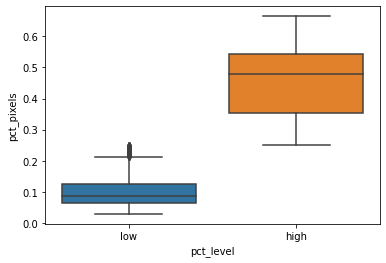

In [ ]:
# sns.boxplot(x=pixel_groups.intensity_level, y=pixel_groups.median_intensity, hue=pixel_groups.pct_level)
# sns.boxplot(x=pixel_groups.intensity_level, y=pixel_groups.median_intensity)
sns.boxplot(x=pixel_groups.pct_level, y=pixel_groups.pct_pixels)



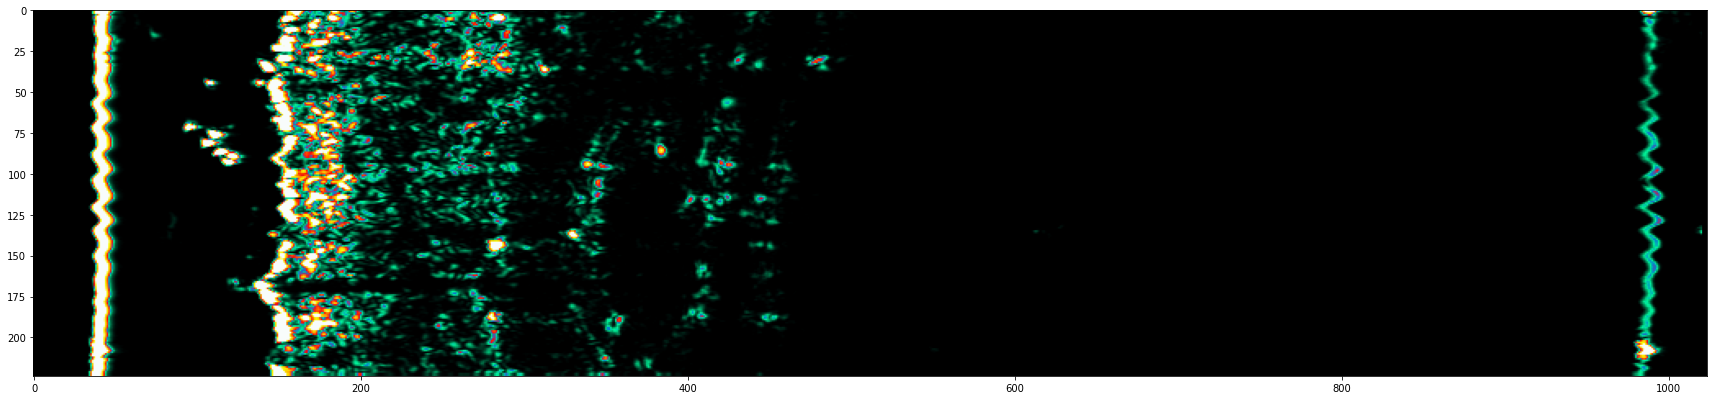

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


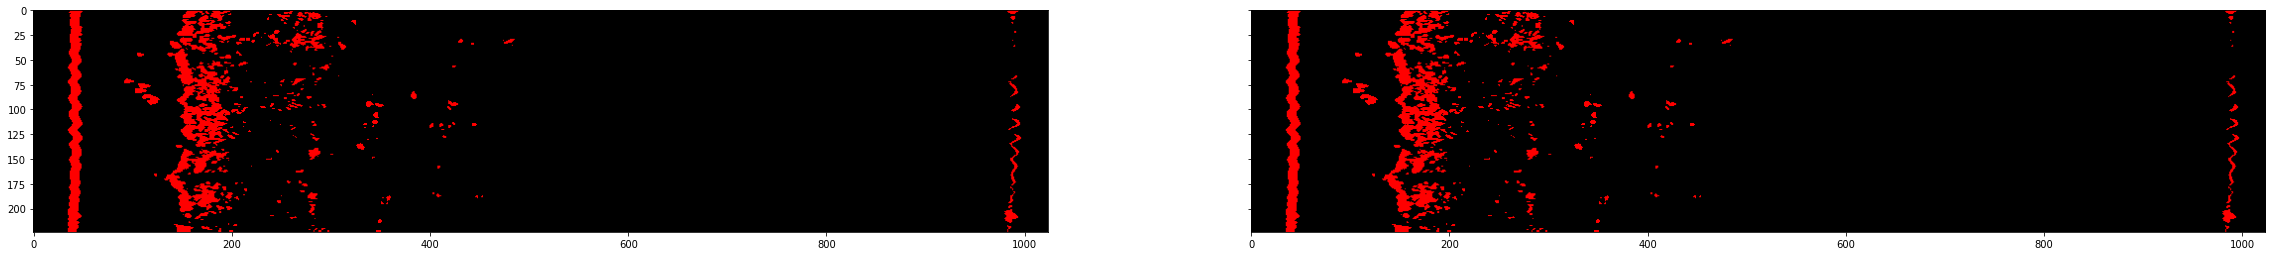

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


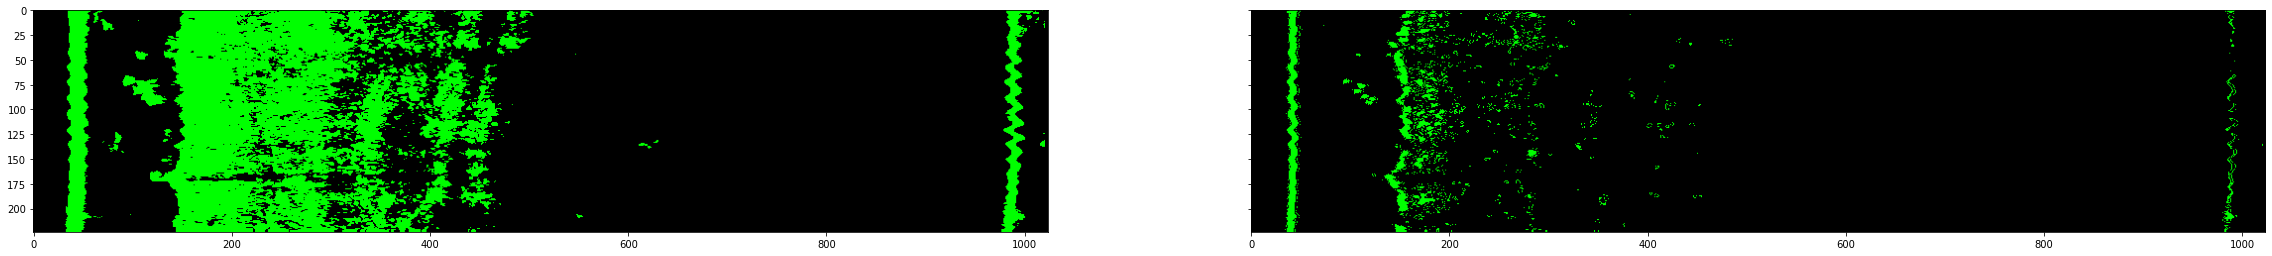

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


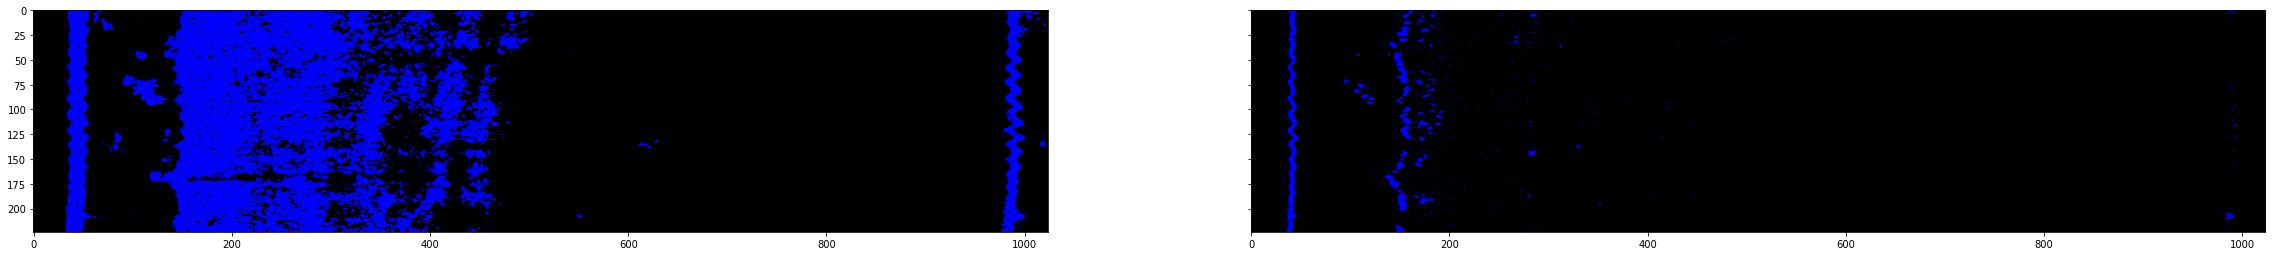

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


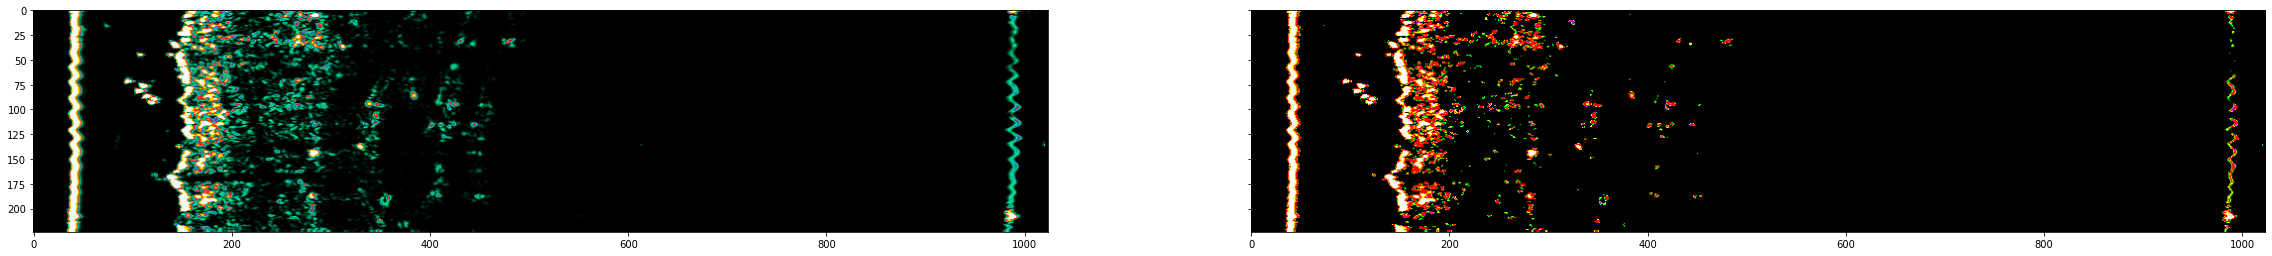

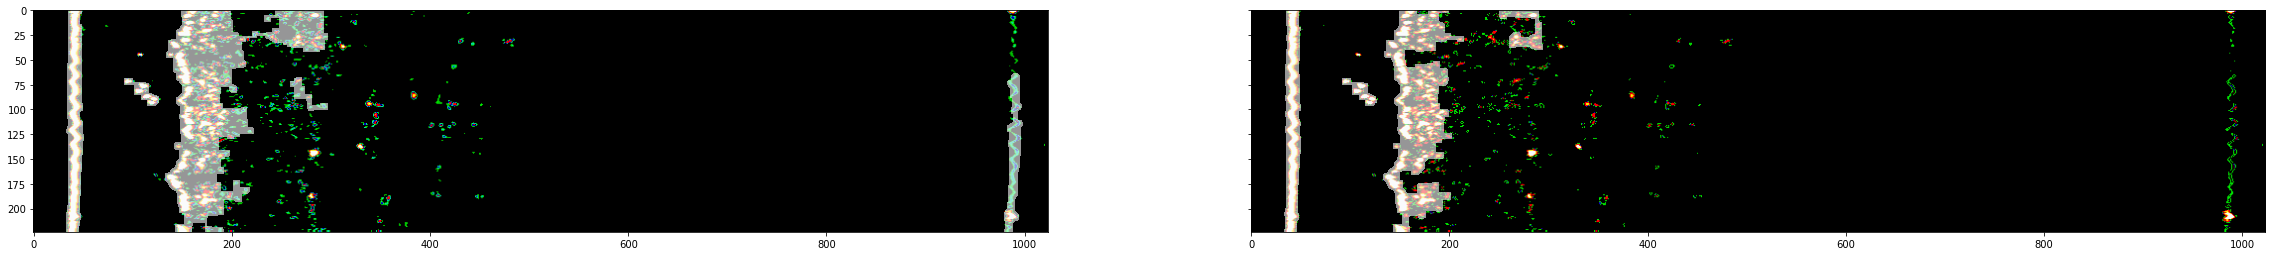

In [ ]:

# x = pd.DataFrame(image_info.sample(n=1))

x = image_info.loc[3076,:]

array_load = load(x["numpy_file_full"])
image = array_load[x["numpy_index"]]

img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(30,20)) 
plt.imshow(img)
plt.show()


# print(img.shape)

threshold_low = 200

new_img = np.zeros(img.shape)

for c in range(0,3):
  channel = img[:,:,c]
  img_color = np.zeros(img.shape)
  img_color[:,:,c] = channel  

  fig, axs = plt.subplots(1,2, figsize=(40,20), sharex=True, sharey=True, gridspec_kw={'hspace': .02})
  axs[0].imshow(img_color)

  if (c!=0):
    ret,img_color = cv2.threshold(img_color, threshold_low, 255, cv2.THRESH_TOZERO)  
 
  axs[1].imshow(img_color)
  plt.show()

  new_img[:,:,c] = img_color[:,:,c]


# ret,new_img = cv2.threshold(new_img, 150, 255, cv2.THRESH_TOZERO)  

fig, axs = plt.subplots(1,2, figsize=(40,20), sharex=True, sharey=True, gridspec_kw={'hspace': .02})
axs[0].imshow(img)
axs[1].imshow(new_img)
plt.show()

new_img = new_img.astype(np.uint8)




s = [[1,1,1],
  [1,1,1],
  [1,1,1]]

ret,thresh = cv2.threshold(img, 150, 255, cv2.THRESH_TOZERO)  
im1 = ndimage.median_filter(thresh, 3)
blurred1 = cv2.GaussianBlur(im1, (5,5), 0)

edge1 = cv2.Canny(blurred1, 175, 200)
edge1 = cv2.dilate(edge1, None, iterations=5)
edge1 = cv2.erode(edge1, None, iterations=3)
filled_edge1 = ndimage.binary_fill_holes(edge1)

labeled_array1, num_features = scipy.ndimage.label(filled_edge1, structure=s)
props_table1 = skimage.measure.regionprops_table(labeled_array1, properties=['label','area'])
props_df1 = pd.DataFrame(props_table1)
props_df1 = props_df1.loc[props_df1['area'] > 500,:]
img_mask1 = np.where(np.isin(labeled_array1, pd.Series(props_df1['label'])),1,np.NaN)

fig, axs = plt.subplots(1,2, figsize=(40,20), sharex=True, sharey=True, gridspec_kw={'hspace': .02})
axs[0].imshow(thresh)
axs[0].imshow(img_mask1, cmap="Purples", alpha=.6)




im = ndimage.median_filter(new_img, 3)
blurred = cv2.GaussianBlur(im, (5,5), 0)

edge = cv2.Canny(blurred, 175, 200)
edge = cv2.dilate(edge, None, iterations=5)
edge = cv2.erode(edge, None, iterations=3)
filled_edge = ndimage.binary_fill_holes(edge)

labeled_array, num_features = scipy.ndimage.label(filled_edge, structure=s)
props_table = skimage.measure.regionprops_table(labeled_array, properties=['label','area'])
props_df = pd.DataFrame(props_table)
props_df = props_df.loc[props_df['area'] > 500,:]
img_mask = np.where(np.isin(labeled_array, pd.Series(props_df['label'])),1,np.NaN)


axs[1].imshow(new_img)
axs[1].imshow(img_mask, cmap="Purples", alpha=.6)

plt.show()




In [ ]:

from skimage import exposure


def threshold_test(sub, loc=None, tri='A',
                     i=1,  
                     threshold_custom=150, 
                     limit=10,
                     alpha_mask=.7):

  image_info_filtered = image_info

  if (sub):
    image_info_filtered = image_info_filtered.loc[image_info["subject"]== sub,:]
  if (loc):
    image_info_filtered = image_info_filtered.loc[image_info_filtered["location"]== loc,:]
  if (tri):
    image_info_filtered = image_info_filtered.loc[image_info_filtered["trial"]== tri,:]

  for i,x in image_info_filtered.iterrows():

    print('Location:', x.location, 'Subject:', x.subject)
    array_load = load(x["numpy_file_full"])
    image = array_load[x["numpy_index"]]

    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    if np.isin(x.location, [left_hand_palm, right_hand_palm]):
      threshold_low = 100
      dilate_iter = 7
      erode_iter = 5
    else:
      threshold_low = 150      
      dilate_iter = 5
      erode_iter = 3

    # # histogram
    # print(np.median(np.nonzero(img_gray)))       
    # plt.hist(img_gray.ravel(), bins = 256)
    # plt.ylim(0,100)
    # plt.show()

    threshold_auto = threshold_low

    pixels = img_gray[img_gray>0]
    pixels = img_gray
    diff=100
    while abs(diff)>limit:
      old_thresh = threshold_auto
      pixels_under = pixels[pixels<threshold_low]
      pixels_over = pixels[pixels>=threshold_low]
      under_mean = np.mean(pixels_under)
      over_mean = np.mean(pixels_over)
      threshold_auto = under_mean + over_mean / 2
      diff = threshold_auto - old_thresh

      # print(loc, 
      #       np.round(threshold_low,0), np.round(diff,0),
      #       np.round(under_mean,0), np.round(over_mean,0))

    print("--",np.round(threshold_auto,0))

    ret,thresh = cv2.threshold(img_gray, threshold_custom, 255, cv2.THRESH_TOZERO)  # original
    im = ndimage.median_filter(thresh, 3)
    blurred = cv2.GaussianBlur(im, (5,5), 0)


    ret2,thresh2 = cv2.threshold(img_gray, threshold_low, 255, cv2.THRESH_TOZERO)  # original
    im2 = ndimage.median_filter(thresh2, 3)
    blurred2 = cv2.GaussianBlur(im2, (5,5), 0)


    s = [[1,1,1],
      [1,1,1],
      [1,1,1]]

    edge = cv2.Canny(blurred, 175, 200)
    edge = cv2.dilate(edge, None, iterations=dilate_iter)
    edge = cv2.erode(edge, None, iterations=erode_iter)
    filled_edge = ndimage.binary_fill_holes(edge)

    labeled_array, num_features = scipy.ndimage.label(filled_edge, structure=s)
    props_table = skimage.measure.regionprops_table(labeled_array, properties=['label','area'])
    props_df = pd.DataFrame(props_table)
    props_df = props_df.loc[props_df['area'] > 500,:]
    img_mask = np.where(np.isin(labeled_array, pd.Series(props_df['label'])),1,np.NaN)


    edge2 = cv2.Canny(blurred2, 175, 200)
    edge2 = cv2.dilate(edge2, None, iterations=dilate_iter)
    edge2 = cv2.erode(edge2, None, iterations=erode_iter)
    filled_edge2 = ndimage.binary_fill_holes(edge2)

    labeled_array2, num_features2 = scipy.ndimage.label(filled_edge2, structure=s)
    props_table2 = skimage.measure.regionprops_table(labeled_array2, properties=['label','area'])
    props_df2 = pd.DataFrame(props_table2)
    props_df2 = props_df.loc[props_df2['area'] > 500,:]
    img_mask2 = np.where(np.isin(labeled_array2, pd.Series(props_df2['label'])),1,np.NaN)



    # plots
    fig, axs = plt.subplots(1,2, figsize=(40,20), sharex=True, sharey=True, gridspec_kw={'hspace': .02})
    axs[0].imshow(img)
    axs[0].imshow(img_mask, cmap="Purples", alpha=alpha_mask)    
    axs[1].imshow(img)
    axs[1].imshow(img_mask2, cmap="Purples", alpha=alpha_mask)
    plt.show()


interactive_plot = interactive(threshold_test, 
                               i=(1,100),
                               sub=subject_list,
                               loc=location_list,
                               tri=['A','B','C'],
                               threshold_custom=(1,250,25), 
                               limit=(1,50),
                               alpha_mask=(0,1,.1))


output = interactive_plot.children[-1]
output.layout.height = '500px'
interactive_plot



interactive(children=(Dropdown(description='sub', options=('SUB01', 'SUB05', 'SUB06', 'SUB07', 'SUB08', 'SUB09…

In [ ]:

def intensity_histogram(sub, loc, tri, 
                     i=1,  
                     threshold_low=150, 
                     limit=10,
                     alpha_mask=.7):

  image_info_filtered = image_info.loc[image_info["subject"]== sub,:]
  image_info_filtered = image_info_filtered.loc[image_info_filtered["location"]== loc,:]
  image_info_filtered = image_info_filtered.loc[image_info_filtered["trial"]== tri,:]

  array_load = load(image_info_filtered.iloc[0]["numpy_file_full"])
  image = array_load[image_info_filtered.iloc[0]["numpy_index"]]

  img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


  if np.isin(loc, [left_hand_palm, right_hand_palm]):
    dilate_iter = 7
    erode_iter = 5
  else:
    dilate_iter = 5
    erode_iter = 3

  # histogram
  # print(np.median(np.nonzero(img_gray)))       
  # plt.hist(img_gray.ravel(), bins = 256)
  # plt.ylim(0,100)
  # plt.show()

  threshold_custom = threshold_low

  pixels = img_gray[img_gray>0]
  pixels = img_gray
  diff=100
  while abs(diff)>limit:
    old_thresh = threshold_low
    pixels_under = pixels[pixels<threshold_low]
    pixels_over = pixels[pixels>=threshold_low]
    under_mean = np.mean(pixels_under)
    over_mean = np.mean(pixels_over)
    threshold_low = under_mean + over_mean / 2
    diff = threshold_low - old_thresh

    # print(loc, 
    #       np.round(threshold_low,0), np.round(diff,0),
    #       np.round(under_mean,0), np.round(over_mean,0))

  print("--",np.round(threshold_low,0))


  # th2 = cv2.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_TOZERO, )
 
  s = [[1,1,1],
    [1,1,1],
    [1,1,1]]
 
  ret1,thresh1 = cv2.threshold(img_gray, threshold_custom, 255, cv2.THRESH_TOZERO)  # original
  ret2,thresh2 = cv2.threshold(img_gray, threshold_low, 255, cv2.THRESH_TOZERO)  # original

  # original code:
  im1 = ndimage.median_filter(thresh1, 3)
  blurred1 = cv2.GaussianBlur(im1, (5,5), 0)

  im2 = ndimage.median_filter(thresh2, 3)
  blurred2 = cv2.GaussianBlur(im2, (5,5), 0)
  
  im3 = ndimage.median_filter(img_gray, 3)
  blurred3 = cv2.GaussianBlur(im3, (5,5), 0)
  ret3,thresh3 = cv2.threshold(blurred3, 0, 255, cv2.THRESH_TOZERO+cv2.THRESH_OTSU)



  edge = cv2.Canny(thresh1, 175, 200)
  edge = cv2.dilate(edge, None, iterations=dilate_iter)
  edge = cv2.erode(edge, None, iterations=erode_iter)
  filled_edge = ndimage.binary_fill_holes(edge)
 

  edge2 = cv2.Canny(thresh2, 175, 200)
  edge2 = cv2.dilate(edge2, None, iterations=dilate_iter)
  edge2 = cv2.erode(edge2, None, iterations=erode_iter)
  filled_edge2 = ndimage.binary_fill_holes(edge2)


  edge3 = cv2.Canny(thresh3, 175, 200)
  edge3 = cv2.dilate(edge3, None, iterations=dilate_iter)
  edge3 = cv2.erode(edge3, None, iterations=erode_iter)
  filled_edge3 = ndimage.binary_fill_holes(edge3)


  labeled_array, num_features = scipy.ndimage.label(filled_edge, structure=s)
  props_table = skimage.measure.regionprops_table(labeled_array, properties=['label','area'])
  props_df = pd.DataFrame(props_table)
  props_df = props_df.loc[props_df['area'] > 500,:]
  img_mask = np.where(np.isin(labeled_array, pd.Series(props_df['label'])),1,np.NaN)

  labeled_array2, num_features = scipy.ndimage.label(filled_edge2, structure=s)
  props_table2 = skimage.measure.regionprops_table(labeled_array2, properties=['label','area'])
  props_df2 = pd.DataFrame(props_table2)
  props_df2 = props_df.loc[props_df2['area'] > 500,:]
  img_mask2 = np.where(np.isin(labeled_array2, pd.Series(props_df2['label'])),1,np.NaN)

  labeled_array3, num_features = scipy.ndimage.label(filled_edge3, structure=s)
  props_table3 = skimage.measure.regionprops_table(labeled_array3, properties=['label','area'])
  props_df3 = pd.DataFrame(props_table3)
  props_df3 = props_df.loc[props_df3['area'] > 500,:]
  img_mask3 = np.where(np.isin(labeled_array3, pd.Series(props_df['label'])),1,np.NaN)


  # plots

  fig, axs = plt.subplots(3,2, figsize=(40,20), sharex=True, sharey=True, gridspec_kw={'hspace': .02})
  axs[0,0].imshow(thresh1, cmap="gray")
  axs[1,0].imshow(thresh2, cmap="gray")
  axs[2,0].imshow(thresh3, cmap="gray")
  axs[0,1].imshow(thresh1, cmap="gray")
  axs[1,1].imshow(thresh2, cmap="gray")
  axs[2,1].imshow(thresh3, cmap="gray")
  axs[0,1].imshow(img_mask, cmap="Purples", alpha=alpha_mask)
  axs[1,1].imshow(img_mask2, cmap="Purples", alpha=alpha_mask)
  axs[2,1].imshow(img_mask3, cmap="Purples", alpha=alpha_mask)



interactive_plot = interactive(intensity_histogram, 
                               i=(1,100),
                               sub=subject_list,
                               loc=location_list,
                               tri=['A','B','C'],
                               threshold_low=(1,250,5), 
                               limit=(1,50),
                               alpha_mask=(0,1,.1))


output = interactive_plot.children[-1]
output.layout.height = '500px'
interactive_plot



interactive(children=(Dropdown(description='sub', options=('SUB01', 'SUB05', 'SUB06', 'SUB07', 'SUB08', 'SUB09…

In [ ]:

def dermascan_tuning(sub, loc, tri, 
                     i=1,  
                     x1=0, x2=1024, y1=0, y2=224, 
                     upper_cutoff = .9, lower_cutoff = .1,
                     defaults=False, 
                     blur_size=5, 
                     thresh_l=150, thresh_u=255, 
                     canny_l=175, canny_u=200, 
                     dilate_iter=5, erode_iter=3, 
                     alpha_mask=.8):

  default_blur_size=5
  default_thresh_l=150
  default_thresh_u=255
  default_canny_l=175
  default_canny_u=200
  default_dilate_iter=5
  default_erode_iter=5

  if defaults:
    blur_size=default_blur_size
    thresh_l=default_thresh_l
    thresh_u=default_thresh_u
    canny_l=default_canny_l
    canny_u=default_canny_u
    dilate_iter=default_dilate_iter
    erode_iter=default_erode_iter


  image_info_filtered = image_info.loc[image_info["subject"]== sub,:]
  image_info_filtered = image_info_filtered.loc[image_info_filtered["location"]== loc,:]
  image_info_filtered = image_info_filtered.loc[image_info_filtered["trial"]== tri,:]

  array_load = load(image_info_filtered.iloc[0]["numpy_file_full"])
  image = array_load[image_info_filtered.iloc[0]["numpy_index"]]

  # interactive image
  img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  print(np.median(np.nonzero(img_gray)))        
#  print(np.mean(np.nonzero(img_gray)))

  sns.distplot(np.nonzero(img_gray))
  plt.show()
  # plt.vlines(np.median(np.nonzero(img_gray)),ymin=0, ymax=max(np.nonzero(img_gray)))

  if (thresh_u < thresh_l):
    thresh_u = thresh_l + 1

  if (canny_u < canny_l):
    canny_u = canny_l + 1 


  ret,thresh1 = cv2.threshold(img_gray, thresh_l, thresh_u, cv2.THRESH_TOZERO)
  im = ndimage.median_filter(thresh1, 3)
  blurred = cv2.GaussianBlur(im, (blur_size,blur_size), 0)

  edge = cv2.Canny(blurred, canny_l, canny_u)
  filled_edge = cv2.dilate(edge, None, iterations=dilate_iter)
  filled_edge = cv2.erode(filled_edge, None, iterations=erode_iter)

  filled_edge = ndimage.binary_fill_holes(filled_edge)

  s = [[1,1,1],
      [1,1,1],
      [1,1,1]]

  labeled_array, num_features = scipy.ndimage.label(filled_edge, structure=s)


  props_table = skimage.measure.regionprops_table(labeled_array, 
                                                  properties=['label',
                                                              'area',
                                                              'bbox',
                                                              'centroid',
                                                              'convex_area',
                                                              'eccentricity',
                                                              'equivalent_diameter',
                                                              'euler_number',
                                                              'extent',
                                                              'filled_area',
                                                              'major_axis_length',
                                                              'minor_axis_length',
                                                              'moments_hu',
                                                              'orientation',
                                                              'perimeter',
                                                              'solidity'])
 
 
  props_df = pd.DataFrame(props_table)
  #print(y1,x1,y2,x2)

  props_df = props_df.loc[props_df['area'] > 250,:]
  
  # print(props_df.loc[:,['label','area','bbox-0','bbox-1','bbox-2','bbox-3']])

  props_df = props_df.loc[props_df['bbox-0'] >= y1,:]
  props_df = props_df.loc[props_df['bbox-1'] >= x1,:]
  props_df = props_df.loc[props_df['bbox-2'] <= y2,:]
  props_df = props_df.loc[props_df['bbox-3'] <= x2,:]

  # props_df = props_df.reset_index(drop=True)

  # print(props_df.loc[:,['bbox-0','bbox-1','bbox-2','bbox-3']])
  # print(np.unique(labeled_array))
  # print(props_df['label'])
  img_mask = np.where(np.isin(labeled_array, pd.Series(props_df['label'])),1,np.NaN)


  mask_df = pd.DataFrame()

  for segment in props_df['label']:
    props_df.loc[segment,"segment"] = segment

    # print("segment:",segment+1)
    minr = props_df["bbox-0"][segment]
    minc = props_df["bbox-1"][segment]
    maxr = props_df["bbox-2"][segment]
    maxc = props_df["bbox-3"][segment]

    mask = np.where(labeled_array == segment, True, False)

    # print("area:",props_df["area"][segment])
    width = mask.sum(axis=1)
#    width = width * scale_50mhz
    mask_df[segment] = width
    # np.count_nonzero(mask_df,axis=1


  mask_df["counts"] = np.count_nonzero(mask_df,axis=1)
  #print(mask_df)

  mask_df = mask_df.loc[mask_df["counts"]==1,:]
  mask_df = mask_df.drop("counts",axis=1)
  mask_df["width"] = mask_df.sum(axis=1)


  # print(len(mask_df.width))
  # plt.show()
  # mask_df['width'].hist(bins=10)


  q25, q75 = mask_df.width.quantile([.25,.75])
  iqr = q75 - q25
  upper_width_limit = q75 + (iqr*1.5)
  lower_width_limit = q25 - (iqr*1.5)

  print("lower_width_limit", lower_width_limit, 
        "upper_width_limit", upper_width_limit, 
        "lower_cutoff", mask_df.width.quantile(lower_cutoff), 
        "upper_cutoff", mask_df.width.quantile(upper_cutoff))
  
  # upper_width_limit = mask_df.width.quantile(upper_cutoff)
  # lower_width_limit = mask_df.width.quantile(lower_cutoff)

  # mask_df = mask_df.loc[mask_df.width < upper_width_limit,:]
  # mask_df = mask_df.loc[mask_df.width > lower_width_limit,:]

  mask_df = mask_df.loc[mask_df.width < mask_df.width.quantile(upper_cutoff),:]
  mask_df = mask_df.loc[mask_df.width > mask_df.width.quantile(lower_cutoff),:]

  # sns.distplot(mask_df.width)
  # plt.vlines(np.median(mask_df.width),ymin=0, ymax=max(mask_df.width))
  # plt.show()
  
  print("median",np.median(mask_df.width))
  
  mask_rows = list(mask_df.index)
  mask_rows_range = np.arange(223)
  unmask_rows = ~np.isin(mask_rows_range, mask_rows)
  img_mask[np.ix_(unmask_rows)] = np.NaN


  # default image
  ret,thresh1 = cv2.threshold(img_gray, default_thresh_l, default_thresh_u, cv2.THRESH_TOZERO)

  im = ndimage.median_filter(thresh1, 3)

  blurred = cv2.GaussianBlur(im, (default_blur_size, default_blur_size), 0)

  edge = cv2.Canny(blurred, default_canny_l, default_canny_u)
  filled_edge = cv2.dilate(edge, None, iterations=default_dilate_iter)
  filled_edge = cv2.erode(filled_edge, None, iterations=default_erode_iter)

  filled_edge = ndimage.binary_fill_holes(filled_edge)

  s = [[1,1,1],
      [1,1,1],
      [1,1,1]]

  labeled_array, num_features = scipy.ndimage.label(filled_edge, structure=s)
  mask_default = np.where(labeled_array>0,1,0)


  # plots

  fig, axs = plt.subplots(2,1, figsize=(30,30), sharex=True, sharey=True, gridspec_kw={'hspace': .02})
  axs[0].imshow(img, cmap="gray")
  axs[0].imshow(img_mask, cmap="Purples", alpha=alpha_mask)
  
  axs[0].vlines(x1,y1,y2, colors='blue')
  axs[0].vlines(x2,y1,y2, colors='magenta')
  axs[0].hlines(y1,x1,x2, colors='blue')
  axs[0].hlines(y2,x1,x2, colors='magenta')

  axs[1].imshow(img, cmap="gray")
  axs[1].imshow(mask_default, alpha=alpha_mask)



interactive_plot = interactive(dermascan_tuning, 
                               i=(1,100),
                               sub=subject_list,
                               loc=location_list,
                               tri=['A','B','C'],
                               x1=(0,1024),
                               x2=(0,1024),
                               y1=(0,224),
                               y2=(0,224),
                               lower_cutoff=(0,1,.05),
                               upper_cutoff=(0,1,.05),
                               defaults=False,
                               thresh_l=(1,250), 
                               thresh_u=(10,255),
                               blur_size=([3,5,7]), 
                               canny_l=(1,250),
                               canny_u=(10,255),
                               dilate_iter=(1,7),
                               erode_iter=(1,7),
                               alpha_mask=(0,1,.1))


output = interactive_plot.children[-1]
output.layout.height = '500px'
interactive_plot



interactive(children=(Dropdown(description='sub', options=('SUB01', 'SUB05', 'SUB06', 'SUB07', 'SUB08', 'SUB09…

In [ ]:
a = np.arange(100).reshape((10,10))



idx = [3,4,6,7]
idx_range = np.arange(10)

idx2 = ~np.isin(idx_range, idx)
print(idx2)

a[np.ix_(idx2)] = 0
a


In [ ]:
a = np.arange(100).reshape(10,10)
a = a * math.pi
a = pd.DataFrame(a)


  
q25, q75 = a[1].quantile([.25,.75])

print(a[1])

np.round([q25,q75],2)

# print(q25,q75)


0      3.141593
1     34.557519
2     65.973446
3     97.389372
4    128.805299
5    160.221225
6    191.637152
7    223.053078
8    254.469005
9    285.884931
Name: 1, dtype: float64


array([ 73.83, 215.2 ])

In [ ]:

mask_df = mask_df.drop(1,axis=1)

np.count_nonzero(mask_df,axis=1)

mask_df["counts"] = np.count_nonzero(mask_df,axis=1)

mask_df = mask_df.loc[mask_df["counts"]==1,:]

mask_df = mask_df.drop("counts",axis=1)

mask_df["width"] = mask_df.sum(axis=1)

mask_df["width"].describe()



In [ ]:
mask_df["width"].describe()

In [ ]:
width = mask_df["width"]


width = width[width > (width.mean() - width.std())]
width = width[width < (width.mean() + width.std())]


print(pd.DataFrame(width).describe())


In [ ]:
width = mask_df["width"]


width = width[width < width.quantile(.90)]
width = width[width > width.quantile(.10)]


print(pd.DataFrame(width).describe())


In [ ]:
width = mask_df[2]

# plt.hist(width,bins=20)
# plt.grid(axis='x')
print(pd.DataFrame(width).describe())

plt.boxplot(width)
plt.show()

width = width[width > (width.mean() - width.std())]
width = width[width < (width.mean() + width.std())]

print(pd.DataFrame(width).describe())

plt.boxplot(width)
plt.show()

# width = width[width < width.quantile(.90)]
# width = width[width > width.quantile(.10)]
# print(pd.DataFrame(width).describe())

# from scipy import stats
# print("\n",stats.percentileofscore(width, .11))


In [ ]:

image_info_filtered = image_info.loc[image_info["subject"]== "SUB10",:]
image_info_filtered = image_info_filtered.loc[image_info_filtered["location"]== "R2",:]
image_info_filtered = image_info_filtered.loc[image_info_filtered["trial"]== "A",:]

for i,x in image_info_filtered[0:1].iterrows():
  print("subject:",x["subject"],"location:",x["location"],"trial:",x["trial"])


  array_load = load(x["numpy_file_full"])
  image = array_load[x["numpy_index"]]
 
  img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  print(np.median(np.nonzero(img_gray)))
  print(np.mean(np.nonzero(img_gray)))

subject: SUB10 location: R2 trial: A
211.0
358.9536928381867


In [ ]:


for i,x in image_info_filtered[0:1].iterrows():
  print("subject:",x["subject"],"location:",x["location"],"trial:",x["trial"])

  array_load = load(x["numpy_file_full"])
  image = array_load[x["numpy_index"]]


def get_measurement(i=1, x1=100, x2=200, y=100):

#  img = cv2.cvtColor(image_array[i], cv2.COLOR_BGR2RGB)
  img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  plt.figure(figsize=(30,20))
  plt.imshow(img, cmap="gray")
  plt.vlines(x1,0,224, colors='red')
  plt.vlines(x2,0,224, colors='magenta')
  plt.hlines(y,0,1024, colors='blue')
  plt.show() 
  print(abs(x2-x1)*scale_50mhz)

interactive_plot = interactive(get_measurement, 
                               i=(1,100),
                               x1=(0,300),
                               x2=(0,300),
                               y=(0,223),
                               )


output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot



subject: SUB18 location: 21 trial: A


interactive(children=(IntSlider(value=1, description='i', min=1), IntSlider(value=100, description='x1', max=3…

In [ ]:
image = cv2.imread("Image01.jpg",1)
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

image_list = []
image_list.append(image)
image_list.append(image)
image_list.append(image)

image_array = np.array(image_list)
print("Shape:",image_array.shape)


Shape: (3, 590, 819, 3)


In [ ]:
np.save("test_save.npy",image_array)


In [ ]:
reloaded_data = np.load("test_save.npy")
print("Shape:", reloaded_data.shape)


Shape: (3, 590, 819, 3)


In [ ]:

print(np.__version__)


1.18.5


In [ ]:
# filter out invalid locations and trials

def remove_invalid_cases(df, col_list, thresh):

  print(df.shape)
  print(col_list)

  for i in col_list:
    valid_values = (df[i].value_counts()>thresh)
    valid_values = valid_values[valid_values==True].index
    df = df.loc[df[i].isin(valid_values),:]

    print(df.shape)

  return (df)


image_info_filtered = remove_invalid_cases(image_info, ['location','trial'],5)

print(image_info_filtered.location.value_counts())

# valid_locations = (image_info["location"].value_counts()>5)
# valid_locations = valid_locations[valid_locations==True].index
# image_info_filtered = image_info.loc[image_info['location'].isin(valid_locations),:]

# print(image_info_filtered.shape)

# valid_trials = (image_info["trial"].value_counts()>5)
# valid_trials = valid_trials[valid_trials==True].index
# image_info_filtered = image_info.loc[image_info['trial'].isin(valid_trials),:]

# print(image_info_filtered.shape)


(8704, 8)
['location', 'trial']
(8668, 8)
(8627, 8)
29      92
30      92
40      91
26      90
27      89
47      89
41      89
22      89
28      89
43      88
44      88
38      88
31      88
48      88
37      88
39      88
21      88
24      88
R27     87
R17     87
36      87
34      87
51      87
32      87
R4      86
25      86
50      86
R22     86
53      86
23      86
52      86
49      86
42      86
R20     85
R3      85
R26     85
33      85
R23     84
R6      84
R29     84
R10     84
CR15    84
R28     84
R15     84
45      84
CR3     84
R32     84
R8      84
R12     84
CR6     83
R1      83
R5      83
R25     83
R21     83
R31     83
CR9     83
R16     83
CR16    82
CR2     82
R13     82
R2      82
R9      82
R18     82
R33     82
R36     82
R7      82
R24     81
CR12    81
R30     81
R34     81
R14     81
CR8     80
46      80
R11     80
CR11    80
CR5     79
R35     79
R19     79
L35     47
L9      46
L20     46
L25     46
L3      45
L34     45
L26     45
L2      45
L1

In [ ]:
# get median image intensities


counter = 0
 
for i,x in image_info.iterrows():
 
  counter = counter + 1
  if(counter%500==0):
    print(counter)
  
  array_load = load(x["numpy_file_full"])
  image = array_load[x["numpy_index"]]
 
  img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
  image_info.loc[i,"median_intensity"] =   np.median(np.nonzero(img_gray))
  image_info.loc[i,"num_pixels"] =   np.count_nonzero(img_gray)
  image_info.loc[i,"pct_pixels"] = np.round(len(np.nonzero(img_gray)[0]) / (1024*224),2)








500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500


In [ ]:
intensity_df = image_info.loc[:,['subject','location','trial','median_intensity']].groupby(["subject","location"],as_index=False).agg('mean')

pixelcount_df = image_info.loc[:,['subject','location','trial','num_pixels']].groupby(["subject","location"],as_index=False).agg('mean')

pixelpct_df = image_info.loc[:,['subject','location','trial','pct_pixels']].groupby(["subject","location"],as_index=False).agg('mean')




In [ ]:
pixelpct_df.head()

,subject,location,pct_pixels
0,SUB01,21,0.060000
1,SUB01,22,0.100000
2,SUB01,23,0.040000
3,SUB01,24,0.066667
4,SUB01,25,0.060000


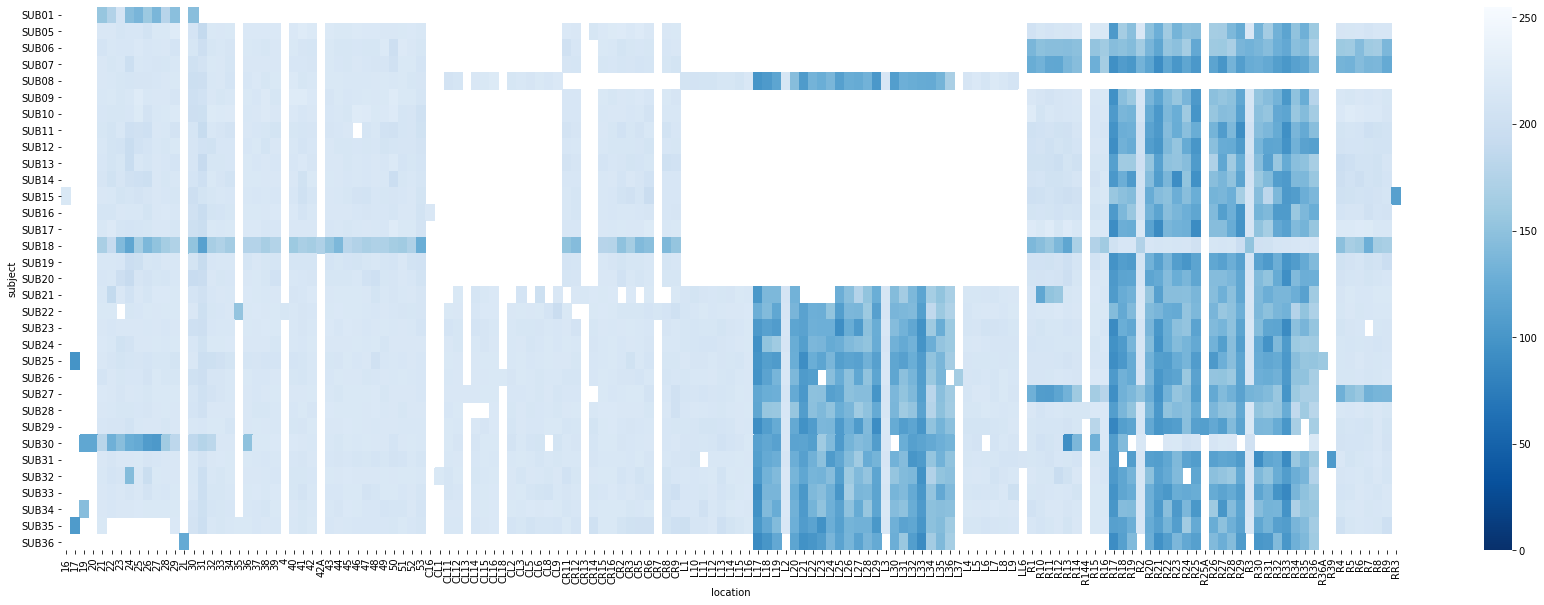

In [ ]:
intensity_df_wide = intensity_df.pivot(index='subject', columns='location', values='median_intensity')

plt.figure(figsize=(30,10))
sns.heatmap(intensity_df_wide,vmin=0,vmax=255,cmap="Blues_r",xticklabels=1, yticklabels=1)

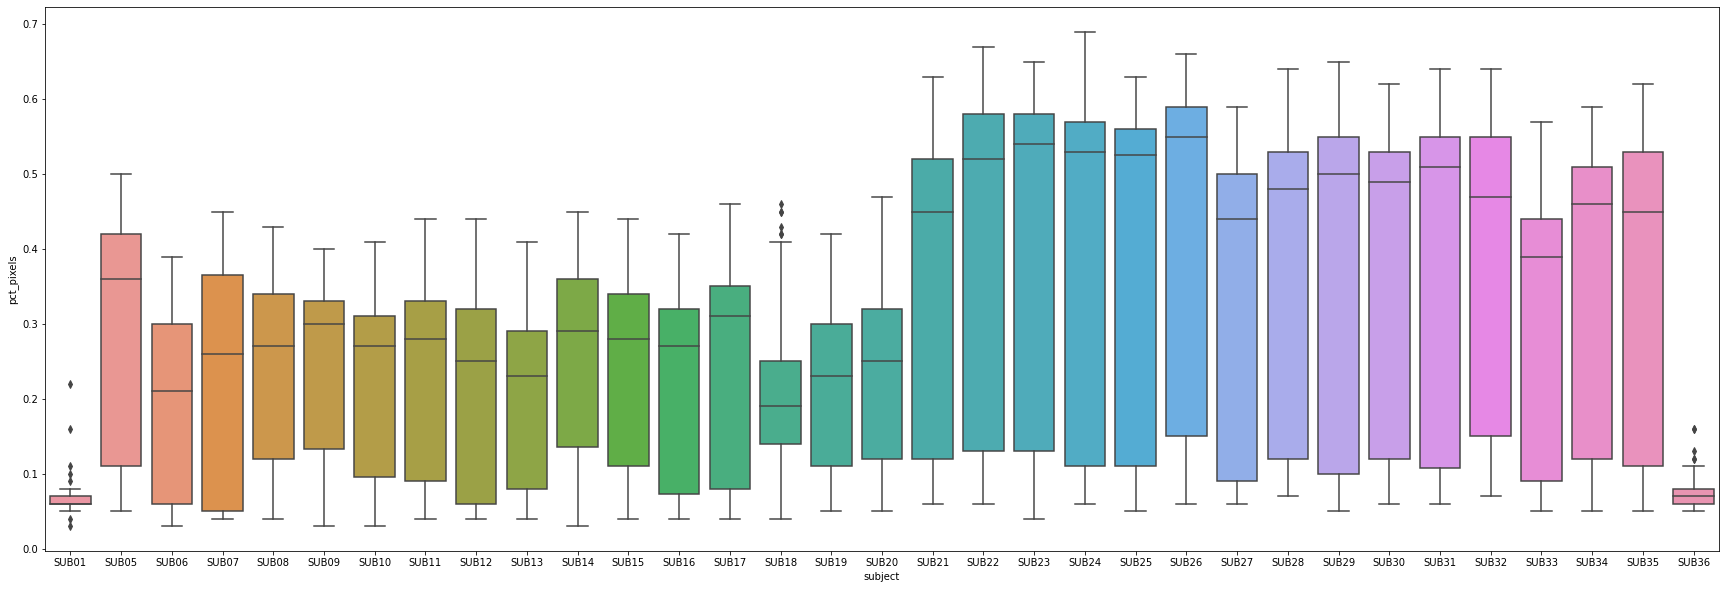

In [ ]:

plt.figure(figsize=(30,10))
sns.boxplot(x=image_info.subject, y=image_info.pct_pixels)

In [ ]:
location_list

array(['21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31',
       '32', '33', '34', '36', '37', '38', '39', '40', '41', '42', '43',
       '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', 'CR11',
       'CR12', 'CR14', 'CR15', 'CR16', 'CR2', 'CR3', 'CR5', 'CR6', 'CR8',
       'CR9', 'R1', 'R10', 'R11', 'R12', 'R13', 'R14', 'R15', 'R16',
       'R17', 'R18', 'R19', 'R2', 'R20', 'R21', 'R22', 'R23', 'R24',
       'R25', 'R26', 'R27', 'R28', 'R29', 'R3', 'R30', 'R31', 'R32',
       'R33', 'R34', 'R35', 'R36', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9',
       'CL11', 'CL12', 'CL14', 'CL15', 'CL16', 'CL2', 'CL3', 'CL5', 'CL6',
       'CL8', 'CL9', 'L1', 'L10', 'L11', 'L12', 'L13', 'L14', 'L15',
       'L16', 'L17', 'L18', 'L19', 'L2', 'L20', 'L21', 'L22', 'L23',
       'L24', 'L25', 'L26', 'L27', 'L28', 'L29', 'L3', 'L30', 'L31',
       'L32', 'L33', 'L34', 'L35', 'L36', 'L4', 'L5', 'L6', 'L7', 'L8',
       'L9', '16', 'RR3', 'C16', '42A', 'CR13', '4', '35', 'CR7', '17',
 

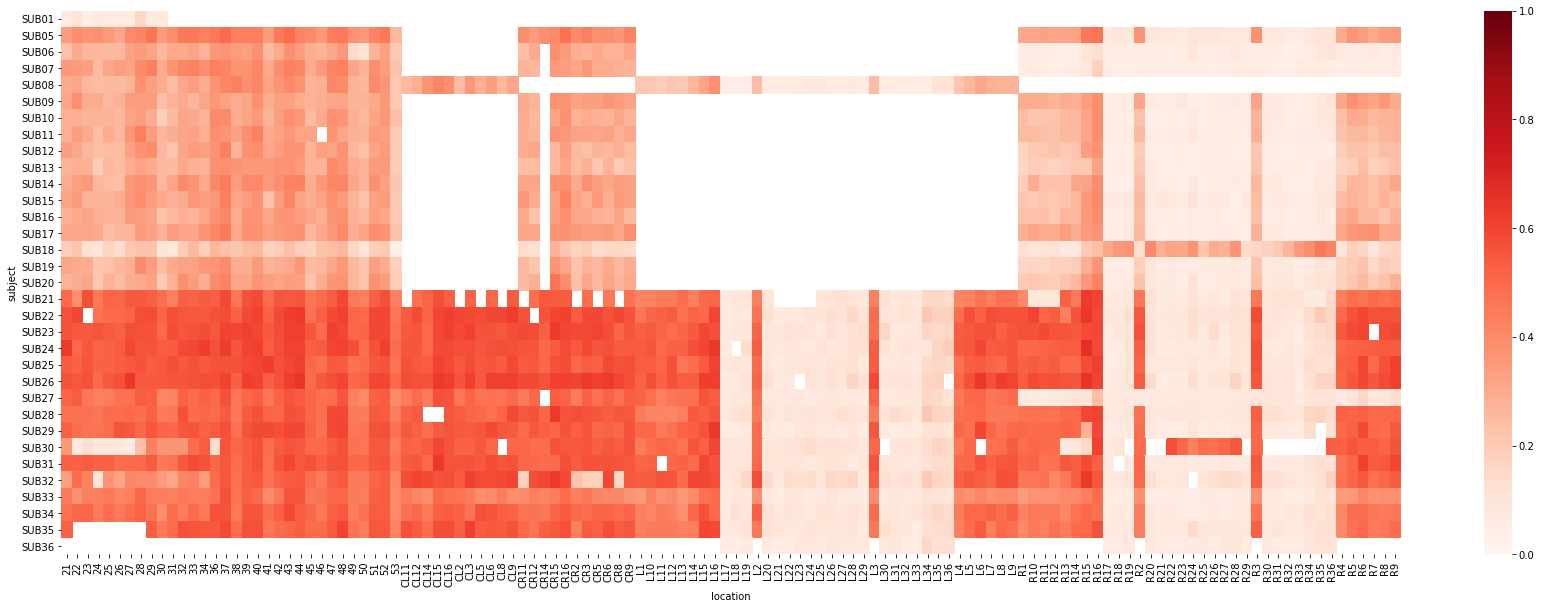

In [ ]:
plt.figure(figsize=(30,10))
# p = sns.boxplot(image_info.pct_pixels, image_info.location)
# p.legend("")
sns.heatmap(pixelpct_df_wide,vmin=0,vmax=1,cmap="Reds",xticklabels=1, yticklabels=1)

(126, 33)

In [ ]:
# pixel_groups.loc[pixel_groups.pct_level=='low',:].shape
pixel_groups.loc[pixel_groups.pct_level=='high',:].shape


(1944, 6)

In [ ]:

pixel_groups = image_info.groupby(['location','subject'], as_index=False)['pct_pixels','median_intensity'].agg('mean').sort_values(['subject','location'], ascending=True)
pixel_groups.loc[pixel_groups.pct_pixels<.25,'pct_level'] = 'low'
pixel_groups.loc[pixel_groups.pct_pixels>=.25,'pct_level'] = 'high'
pixel_groups.loc[pixel_groups.median_intensity<175,'intensity_level'] = 'low'
pixel_groups.loc[pixel_groups.median_intensity>=175,'intensity_level'] = 'high'

pd.crosstab(pixel_groups.location, pixel_groups.intensity_level)

pixel_lookup_table = pixel_groups.groupby(['pct_level','location','subject'], as_index=False).count().pivot(index='location', columns='subject', values='pct_level')


In [ ]:
intensity_df_wide_diff = pd.DataFrame(columns=intensity_df_wide.columns)

for i in intensity_df_wide.columns:
  intensity_df_wide_diff.loc[i] = intensity_df_wide[i] - intensity_df_wide[i].mean()

intensity_df_wide_diff.head() 


In [ ]:
intensity_df_wide.columns

Index(['16', '17', '19', '20', '21', '22', '23', '24', '25', '26',
       ...
       'R36', 'R36A', 'R39', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'RR3'],
      dtype='object', name='location', length=147)

In [ ]:
for g in location_groups:
  np.isin(intensity_df_wide.columns, g)



#image_info.loc[:,['subject','location','trial','median_intensity']].groupby(["subject","location"],as_index=False).agg('mean')



 - left_hand_back
213.0 



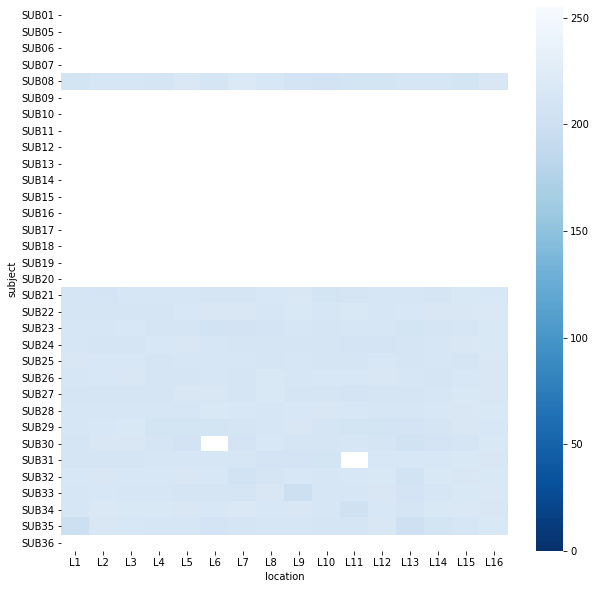


 - left_hand_palm
130.0 



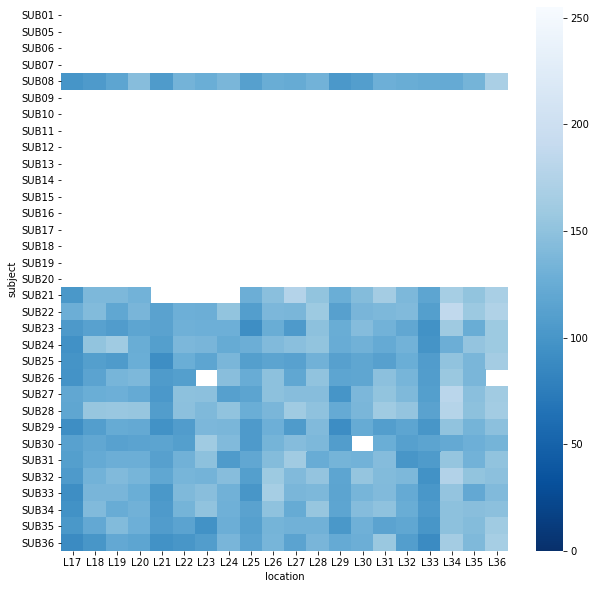


 - right_hand_back
201.0 



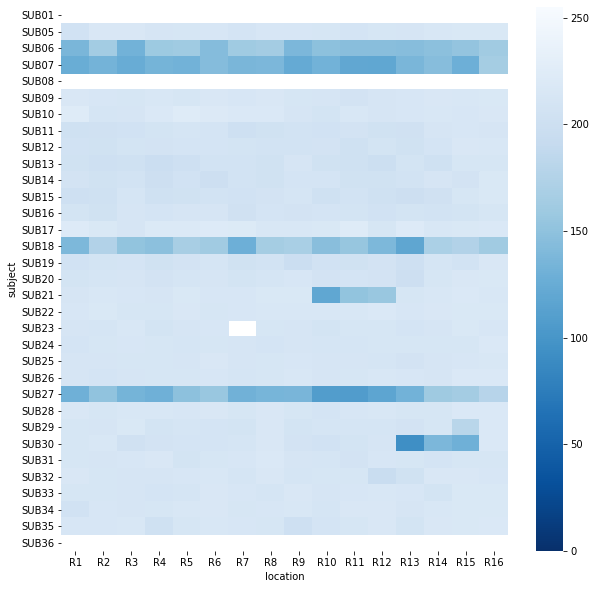


 - right_hand_palm
134.0 



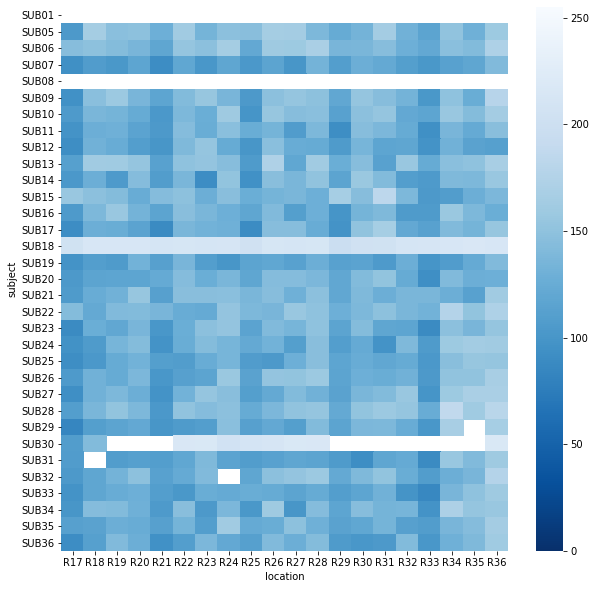


 - face
207.0 



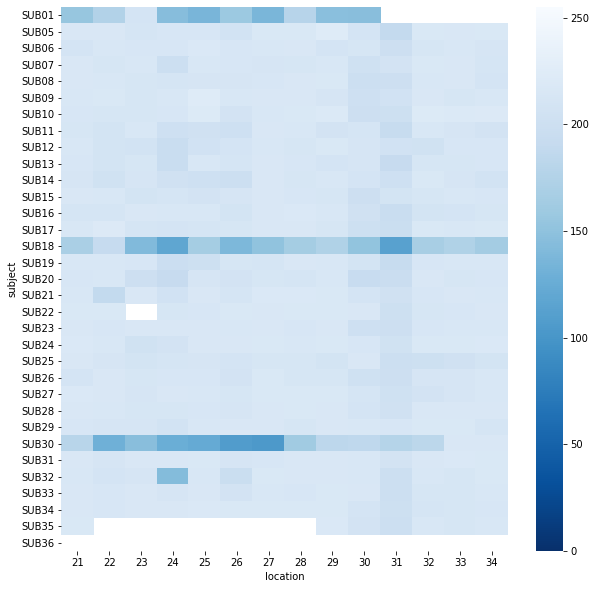


 - body_front
213.0 



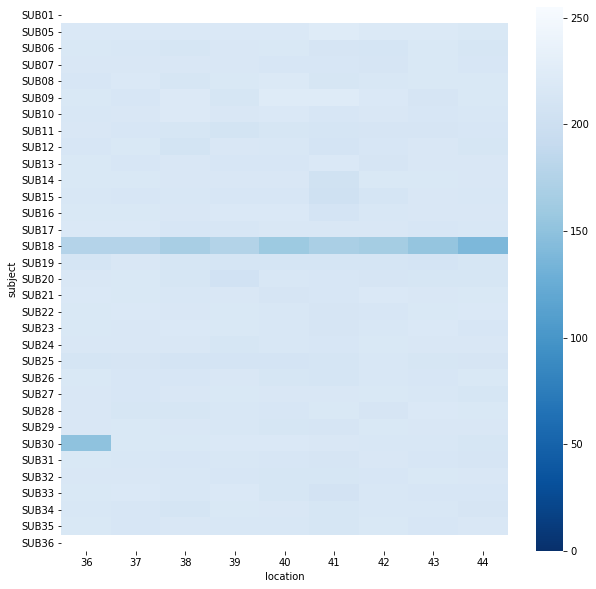


 - body_back
212.0 



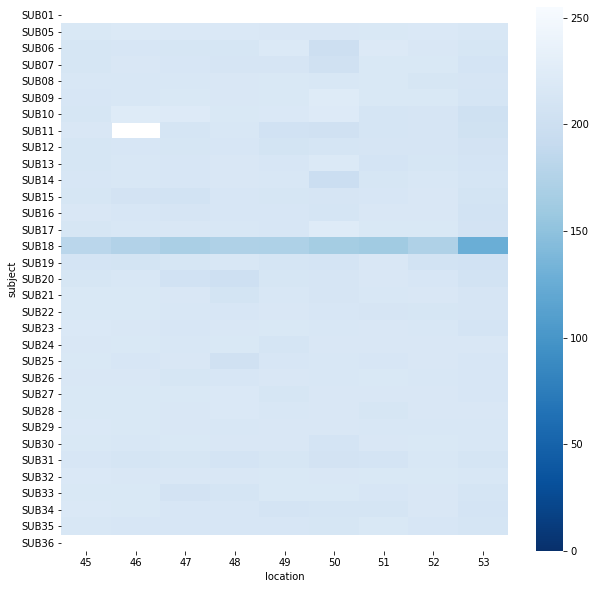

In [ ]:

print("\n - left_hand_back")
print(round(intensity_df_wide[left_hand_back].mean().mean(),0),"\n")
plt.figure(figsize=(10,10))
sns.heatmap(intensity_df_wide[left_hand_back],vmin=0,vmax=255,cmap="Blues_r",xticklabels=1, yticklabels=1)
plt.show()

print("\n - left_hand_palm")
print(round(intensity_df_wide[left_hand_palm].mean().mean(),0),"\n")
plt.figure(figsize=(10,10))
sns.heatmap(intensity_df_wide[left_hand_palm],vmin=0,vmax=255,cmap="Blues_r",xticklabels=1, yticklabels=1)
plt.show()

print("\n - right_hand_back")
print(round(intensity_df_wide[right_hand_back].mean().mean(),0),"\n")
plt.figure(figsize=(10,10))
sns.heatmap(intensity_df_wide[right_hand_back],vmin=0,vmax=255,cmap="Blues_r",xticklabels=1, yticklabels=1)
plt.show()

print("\n - right_hand_palm")
print(round(intensity_df_wide[right_hand_palm].mean().mean(),0),"\n")
plt.figure(figsize=(10,10))
sns.heatmap(intensity_df_wide[right_hand_palm],vmin=0,vmax=255,cmap="Blues_r",xticklabels=1, yticklabels=1)
plt.show()


print("\n - face")
print(round(intensity_df_wide[face].mean().mean(),0),"\n")
plt.figure(figsize=(10,10))
sns.heatmap(intensity_df_wide[face],vmin=0,vmax=255,cmap="Blues_r",xticklabels=1, yticklabels=1)
plt.show()

print("\n - body_front")
print(round(intensity_df_wide[body_front].mean().mean(),0),"\n")
plt.figure(figsize=(10,10))
sns.heatmap(intensity_df_wide[body_front],vmin=0,vmax=255,cmap="Blues_r",xticklabels=1, yticklabels=1)
plt.show()

print("\n - body_back")
print(round(intensity_df_wide[body_back].mean().mean(),0),"\n")
plt.figure(figsize=(10,10))
sns.heatmap(intensity_df_wide[body_back],vmin=0,vmax=255,cmap="Blues_r",xticklabels=1, yticklabels=1)
plt.show()



In [ ]:
#intensity_df_wide = intensity_df[intensity_df['location'].isin(face)].pivot(index='subject', columns='location', values='median_intensity')
pixelcount_df_wide = pixelcount_df.pivot(index='subject', columns='location', values='num_pixels')

plt.figure(figsize=(10,10))
sns.heatmap(pixelcount_df_wide[left_hand_back],cmap="Blues_r",xticklabels=1, yticklabels=1)
plt.show()
sns.heatmap(pixelcount_df_wide[left_hand_palm],cmap="Blues_r",xticklabels=1, yticklabels=1)
plt.show()
sns.heatmap(pixelcount_df_wide[right_hand_back],cmap="Blues_r",xticklabels=1, yticklabels=1)
plt.show()
sns.heatmap(pixelcount_df_wide[right_hand_palm],cmap="Blues_r",xticklabels=1, yticklabels=1)
plt.show()

#sns.heatmap(pixelcount_df_wide[left_hand_back_clenched],cmap="Blues_r",xticklabels=1, yticklabels=1)
#sns.heatmap(pixelcount_df_wide[left_hand_palm_clenched],cmap="Blues_r",xticklabels=1, yticklabels=1)
#sns.heatmap(pixelcount_df_wide[right_hand_back_clenched],cmap="Blues_r",xticklabels=1, yticklabels=1)
#sns.heatmap(pixelcount_df_wide[right_hand_palm_clenched],cmap="Blues_r",xticklabels=1, yticklabels=1)

sns.heatmap(pixelcount_df_wide[face],cmap="Blues_r",xticklabels=1, yticklabels=1)
plt.show()
sns.heatmap(pixelcount_df_wide[body_front],cmap="Blues_r",xticklabels=1, yticklabels=1)
plt.show()
sns.heatmap(pixelcount_df_wide[body_back],cmap="Blues_r",xticklabels=1, yticklabels=1)
plt.show()



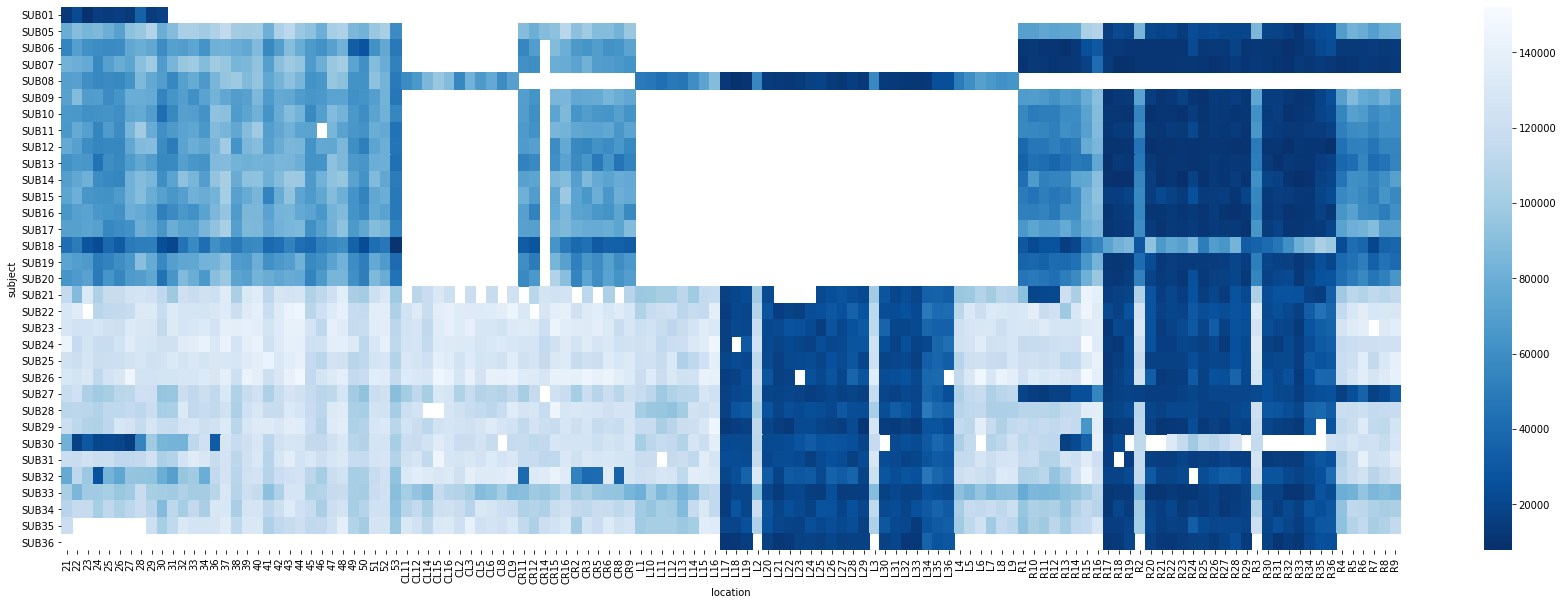

In [ ]:
  
  plt.figure(figsize=(30,10))
  sns.heatmap(pixelcount_df_wide,cmap="Blues_r",xticklabels=1, yticklabels=1)



In [ ]:
list(pixelcount_df_wide.columns)



In [ ]:

left_hand_back = ['L1','L2','L3','L4','L5','L6','L7','L8','L9','L10','L11','L12','L13','L14','L15','L16']
left_hand_palm = ['L17','L18','L19','L20','L21','L22','L23','L24','L25','L26','L27','L28','L29','L30','L31','L32','L33','L34','L35','L36']
right_hand_back = ['R1','R2','R3','R4','R5','R6','R7','R8','R9','R10','R11','R12','R13','R14','R15','R16']
right_hand_palm = ['R17','R18','R19','R20','R21','R22','R23','R24','R25','R26','R27','R28','R29','R30','R31','R32','R33','R34','R35','R36']
#left_hand_back_clenched = ['CL1','CL2','CL3','CL4','CL5','CL6','CL7','CL8','CL9','CL10','CL11','CL12','CL13','CL14','CL15','CL16']
left_hand_back_clenched = ['CL2','CL3','CL5','CL6','CL8','CL9','CL11','CL12','CL14','CL15','CL16']
left_hand_palm_clenched = ['CL17','CL18','CL19','CL20','CL21','CL22','CL23','CL24','CL25','CL26','CL27','CL28','CL29','CL30','CL31','CL32','CL33','CL34','CL35','CL36']
right_hand_back_clenched = ['CR1','CR2','CR3','CR4','CR5','CR6','CR7','CR8','CR9','CR10','CR11','CR12','CR13','CR14','CR15','CR16']
right_hand_palm_clenched = ['CR17','CR18','CR19','CR20','CR21','CR22','CR23','CR24','CR25','CR26','CR27','CR28','CR29','CR30','CR31','CR32','CR33','CR34','CR35','CR36']

face = ['21','22','23','24','25','26','27','28','29','30','31','32','33','34','54']
body_front = ['36','37','38','39','40','41','42','43','44']
body_back = ['45','46','47','48','49','50','51','52','53']

location_groups = [left_hand_back, left_hand_palm, left_hand_back_clenched, left_hand_palm_clenched, right_hand_back, right_hand_palm, right_hand_back_clenched, right_hand_palm_clenched, face, body_front, body_back]




In [ ]:

#for i in location_groups:
i = left_hand_palm + right_hand_palm
print(intensity_df[intensity_df.location.isin(i)].groupby(['subject','location']).agg(['mean','min','max']))



                 median_intensity                        
                             mean         min         max
subject location                                         
SUB05   R17            103.666667  103.666667  103.666667
        R18            165.333333  165.333333  165.333333
        R19            147.333333  147.333333  147.333333
        R20            149.333333  149.333333  149.333333
        R21            129.000000  129.000000  129.000000
        R22            162.333333  162.333333  162.333333
        R23            134.000000  134.000000  134.000000
        R24            147.666667  147.666667  147.666667
        R25            145.666667  145.666667  145.666667
        R26            164.666667  164.666667  164.666667
        R27            164.000000  164.000000  164.000000
        R28            139.333333  139.333333  139.333333
        R29            123.666667  123.666667  123.666667
        R30            132.666667  132.666667  132.666667
        R31   

In [ ]:
#sns.boxplot(x=location_groups, y='num_pixels', data=pixelcount_df_wide)

pixelcount_df_wide[location_groups[5]].head()